# Topic 1: Determine the dominating factors for the quality of Agnet-Generated PRs

In [99]:
#importing necessary packages
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import PartialDependenceDisplay

In [9]:
#importing the cleaned dataset from the AIDev_General_Cleaning
high=pd.read_csv('quality.csv')

In [10]:
high

,id_x,created_at,closed_at,repo_id,agent,review_count,turnaround_hours,review_log,review_norm_raw,review_norm,...,commit_count,max_change,total_change,avg_change,total_additions,total_deletions,id_y,stars,forks,language
0,2757674020,2024-12-24 11:56:28+00:00,2024-12-24 12:28:56+00:00,689765175.0,Devin,0,0.54,0.0,0.0,1.0,...,6.0,1050.0,2493.0,95.884615,1646.0,847.0,689765175.0,696.0,117.0,TypeScript
1,2758172742,2024-12-24 17:57:41+00:00,2024-12-24 19:51:08+00:00,689765175.0,Devin,0,1.89,0.0,0.0,1.0,...,2.0,128.0,528.0,58.666667,515.0,13.0,689765175.0,696.0,117.0,TypeScript
2,2758215458,2024-12-24 19:11:10+00:00,2024-12-24 19:59:32+00:00,883825890.0,Devin,0,0.81,0.0,0.0,1.0,...,6.0,199.0,870.0,58.000000,433.0,437.0,883825890.0,116.0,17.0,Solidity
3,2758578416,2024-12-25 07:25:56+00:00,2024-12-25 07:28:26+00:00,689765175.0,Devin,0,0.04,0.0,0.0,1.0,...,2.0,72.0,208.0,41.600000,197.0,11.0,689765175.0,696.0,117.0,TypeScript
4,2758595312,2024-12-25 07:51:01+00:00,2024-12-25 08:42:23+00:00,689765175.0,Devin,0,0.86,0.0,0.0,1.0,...,6.0,265.0,624.0,48.000000,541.0,83.0,689765175.0,696.0,117.0,TypeScript
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24009,3278088521,2025-07-30 18:32:13+00:00,2025-07-30 18:32:36+00:00,233712297.0,OpenAI_Codex,0,0.01,0.0,0.0,1.0,...,1.0,44.0,44.0,44.000000,26.0,18.0,233712297.0,404.0,76.0,C++
24010,3278090865,2025-07-30 18:33:17+00:00,2025-07-30 18:34:14+00:00,233712297.0,OpenAI_Codex,0,0.02,0.0,0.0,1.0,...,2.0,77.0,117.0,39.000000,70.0,47.0,233712297.0,404.0,76.0,C++
24011,3278111128,2025-07-30 18:41:56+00:00,2025-07-30 18:43:39+00:00,922805069.0,OpenAI_Codex,0,0.03,0.0,0.0,1.0,...,1.0,43.0,43.0,43.000000,17.0,26.0,922805069.0,251.0,58.0,Python
24012,3278116754,2025-07-30 18:44:34+00:00,2025-07-30 18:44:46+00:00,233712297.0,OpenAI_Codex,0,0.00,0.0,0.0,1.0,...,1.0,15.0,15.0,15.000000,9.0,6.0,233712297.0,404.0,76.0,C++


## Step 1: Splitting the dataset based on the quality score

We first divide the dataset into two groups: PRs with a quality score of 90 or above, and PRs with a score below 90.

In [ ]:
high_high=high[high['Y_quality']>=90]
low_high=high[high['Y_quality']<90]

## Step 2: Determine the dominating factors for the quality of PRs

#### Step 2.1: Task Type

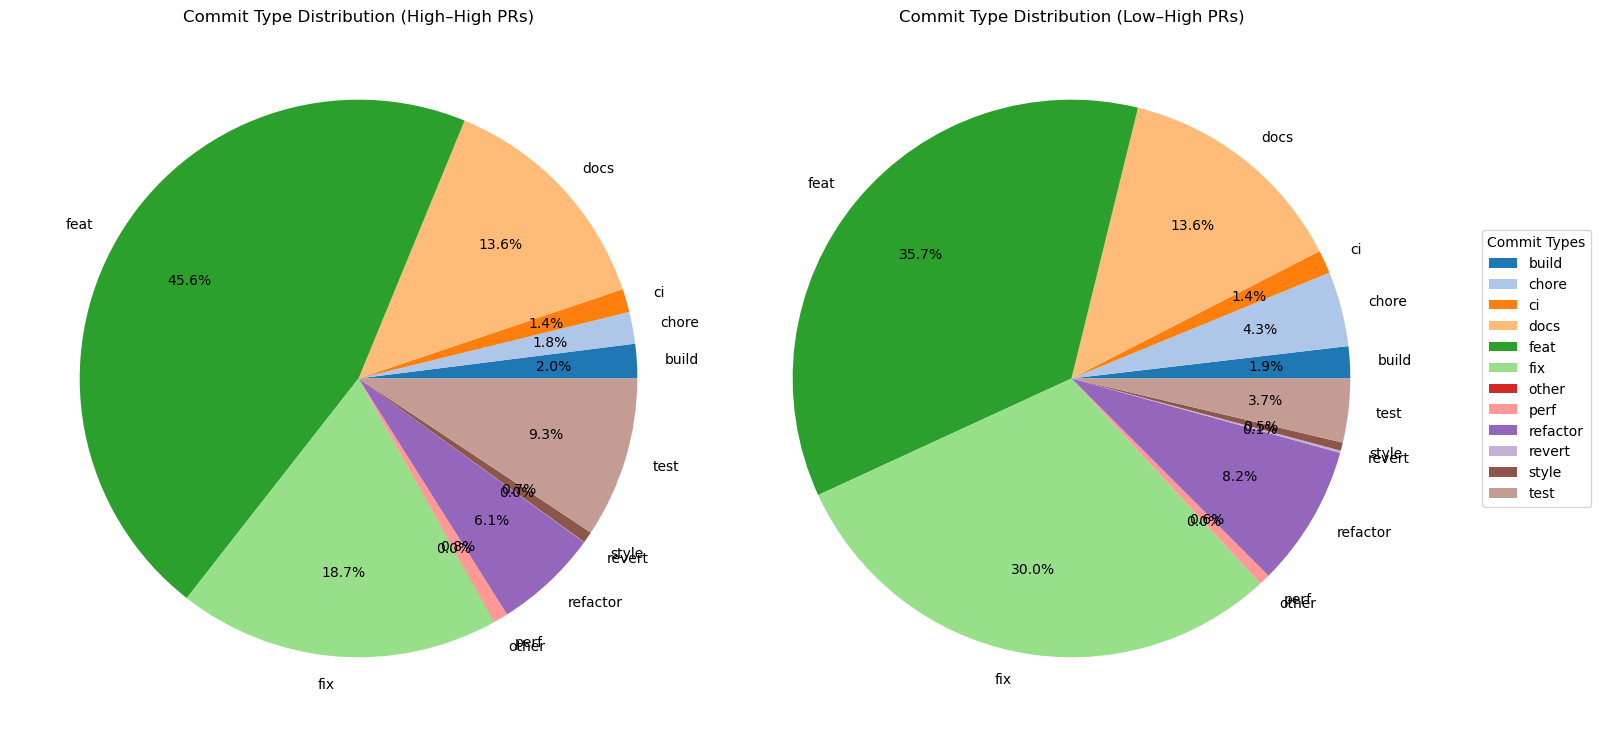

In [27]:
data1 = Counter(high_high['type'])
data2 = Counter(low_high['type'])

all_labels = sorted(set(data1.keys()).union(data2.keys()))

cmap = plt.get_cmap("tab20")
color_map = {label: cmap(i) for i, label in enumerate(all_labels)}
colors = [color_map[label] for label in all_labels]

sizes1 = [data1.get(label, 0) for label in all_labels]
sizes2 = [data2.get(label, 0) for label in all_labels]

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].pie(sizes1, labels=all_labels, colors=colors, autopct='%1.1f%%',
           labeldistance=1.1, pctdistance=0.7)
axs[0].set_title("Commit Type Distribution (High–High PRs)")

axs[1].pie(sizes2, labels=all_labels, colors=colors, autopct='%1.1f%%',
           labeldistance=1.1, pctdistance=0.7)
axs[1].set_title("Commit Type Distribution (Low–High PRs)")

fig.legend(all_labels, loc='center right', title="Commit Types")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

We observe that PRs categorized as `feat` and `test` are more likely to receive lower quality scores, whereas PRs labeled as `fix` and `chore` tend to achieve higher quality scores.

#### Step 2.2: Repo language type:

In [28]:
language1=Counter(high['language'])
language2=Counter(high['language'][high['Y_quality']>=90])
def top10_percent(counter):
    total = sum(counter.values())
    top10 = counter.most_common(10)
    df = pd.DataFrame(top10, columns=["Language", "Count"])
    df["Percent"] = df["Count"] / total * 100
    return df
df1 = top10_percent(language1)
df2 = top10_percent(language2)

print("===== High Quality PR language (Top 10) =====")
print(df1.to_string(index=False, formatters={'Percent': '{:.2f}%'.format}))

print("\n===== High Quality High Efficiency language  (Top 10) =====")
print(df2.to_string(index=False, formatters={'Percent': '{:.2f}%'.format}))

===== High Quality PR language (Top 10) =====
  Language  Count Percent
        Go   8361  34.82%
    Python   5468  22.77%
TypeScript   3787  15.77%
        C#   1146   4.77%
      Java   1006   4.19%
      Rust    692   2.88%
JavaScript    641   2.67%
      HTML    615   2.56%
      Ruby    341   1.42%
    Kotlin    301   1.25%

===== High Quality High Efficiency language  (Top 10) =====
  Language  Count Percent
        Go   7867  46.12%
    Python   4239  24.85%
TypeScript   1421   8.33%
      Java    894   5.24%
      HTML    509   2.98%
        C#    461   2.70%
      Rust    303   1.78%
JavaScript    300   1.76%
    Kotlin    237   1.39%
      Ruby    158   0.93%


For the top 10 most commonly used programming languages in the PR dataset, we observe that PRs written in Go are more likely to be of high quality, whereas those written in TypeScript and C# tend to show a lower likelihood of achieving high quality.

#### Step 2.3: Agent type:

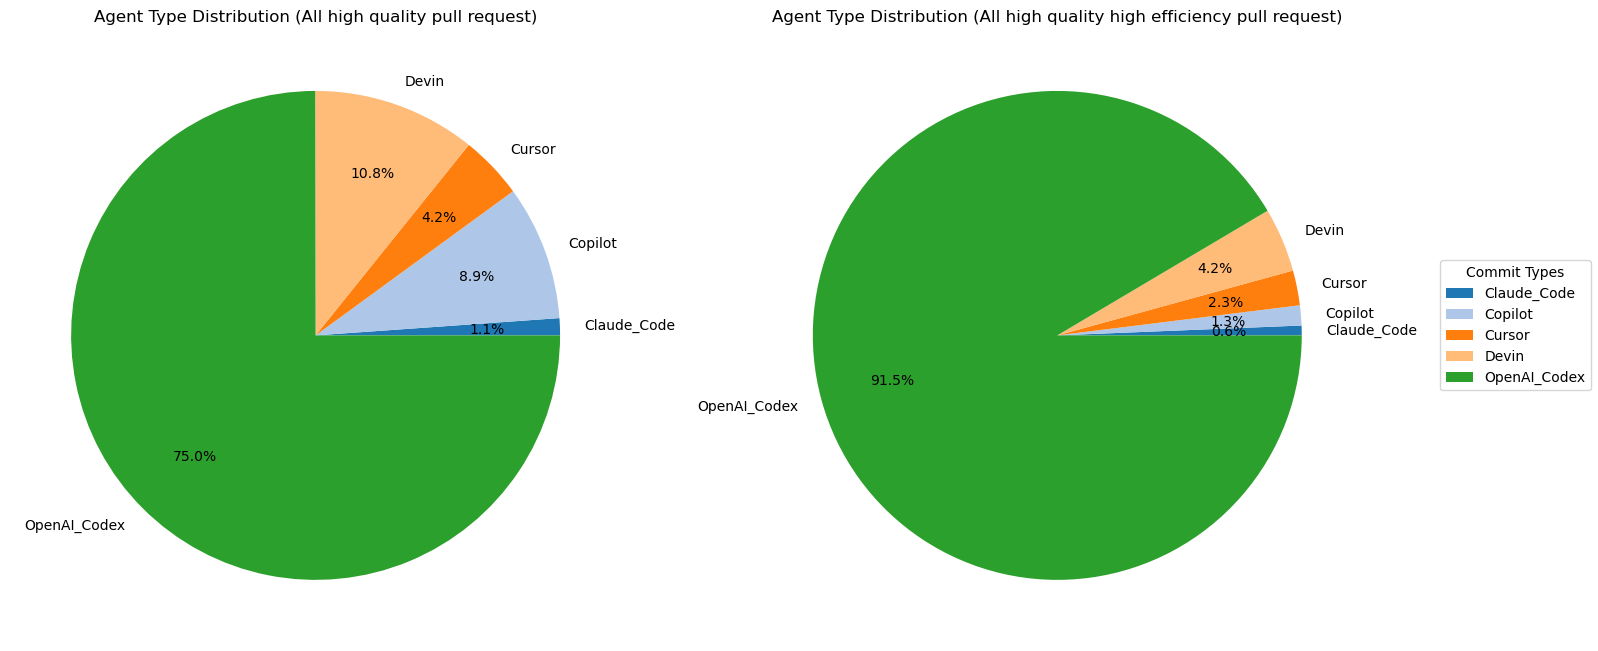

In [29]:
agent1=Counter(high['agent'])
agent2=Counter(high['agent'][high['Y_quality']>=90])
all_labels = sorted(set(agent1.keys()).union(agent2.keys()))
cmap = plt.get_cmap("tab20")
color_map = {label: cmap(i) for i, label in enumerate(all_labels)}
sizes1 = [agent1.get(label, 0) for label in all_labels]
sizes2 = [agent2.get(label, 0) for label in all_labels]
colors = [color_map[label] for label in all_labels]
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].pie(sizes1, labels=all_labels, colors=colors, autopct='%1.1f%%', labeldistance=1.1, pctdistance=0.7)
axs[0].set_title("Agent Type Distribution (All high quality pull request)")
axs[1].pie(sizes2, labels=all_labels, colors=colors, autopct='%1.1f%%', labeldistance=1.1, pctdistance=0.7)
axs[1].set_title("Agent Type Distribution (All high quality high efficiency pull request)")
fig.legend(all_labels, loc='center right', title="Commit Types")
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

We can see that OpenAI_Codex tend to preduce code with high quality and high efficiency

#### Step 2.5: Commit Count:

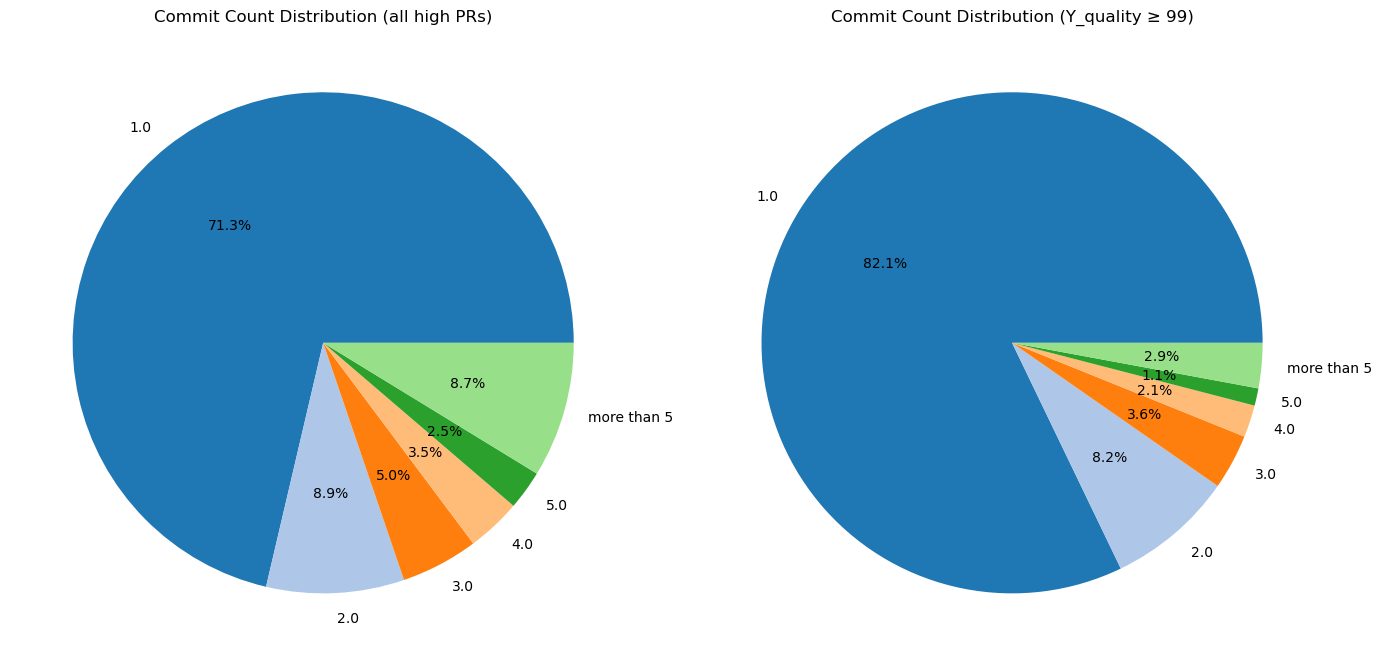

In [18]:
commit1=Counter(high['commit_count'])
commit2=Counter(high['commit_count'][high['Y_quality']>=90])
def compress_counter(cnt, threshold=5.0):
    new = Counter()
    more = 0
    for k, v in cnt.items():
        if k <= threshold:
            new[k] += v
        else:
            more += v
    new["more than 5"] = more
    return new

c1 = compress_counter(commit1)
c2 = compress_counter(commit2)
value_labels = sorted(k for k in c1.keys() if k != "more than 5") + ["more than 5"]
plot_labels = [str(k) for k in value_labels]
cmap = plt.get_cmap("tab20")
color_map = {str(k): cmap(i) for i, k in enumerate(value_labels)}
colors = [color_map[str(k)] for k in value_labels]
sizes1 = [c1[k] for k in value_labels]
sizes2 = [c2[k] for k in value_labels]
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].pie(sizes1, labels=plot_labels, colors=colors, autopct='%1.1f%%')
axs[0].set_title("Commit Count Distribution (all high PRs)")
axs[1].pie(sizes2, labels=plot_labels, colors=colors, autopct='%1.1f%%')
axs[1].set_title("Commit Count Distribution (Y_quality ≥ 90)")
plt.tight_layout()
plt.show()

The high efficient PR will tend to have less commit count

#### Step 2.6: Total Change, total additions, total deletions and average change:

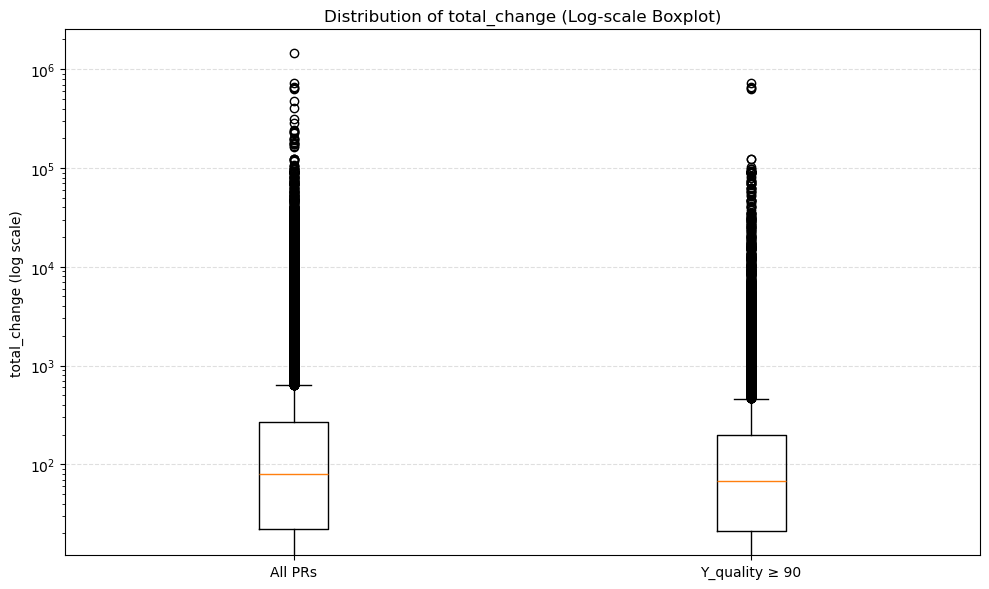

In [31]:
change1=(high['total_change'])
change2=(high['total_change'][high['Y_quality']>=90])
plt.figure(figsize=(10, 6))
plt.boxplot([change1, change2], tick_labels=["All PRs", "Y_quality ≥ 90"])
plt.yscale("log")

plt.title("Distribution of total_change (Log-scale Boxplot)")
plt.ylabel("total_change (log scale)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [20]:
stat, p = ks_2samp(change1, change2)
print("KS statistic:", stat)
print("p-value:", p)
if p < 0.05:
    print("Two distributions are significantly different")
else:
    print("No significant difference in distributions")

KS statistic: 0.04789784701025501
p-value: 2.401102630133002e-22
Two distributions are significantly different


In [21]:
avg1=(high['avg_change'])
avg2=(high['avg_change'][high['Y_quality']>=90])
stat, p = ks_2samp(avg1, avg2)
print("KS statistic:", stat)
print("p-value:", p)
if p < 0.05:
    print("Two distributions are significantly different")
else:
    print("No significant difference in distributions")

KS statistic: 0.014783425604416367
p-value: 0.01624950612900573
Two distributions are significantly different


We can see that both the avg_change and total_change correlated with the quality and efficiency of the PR

KS statistic: 0.07391153985819265
p-value: 7.872571814750808e-48
Two distributions are significantly different


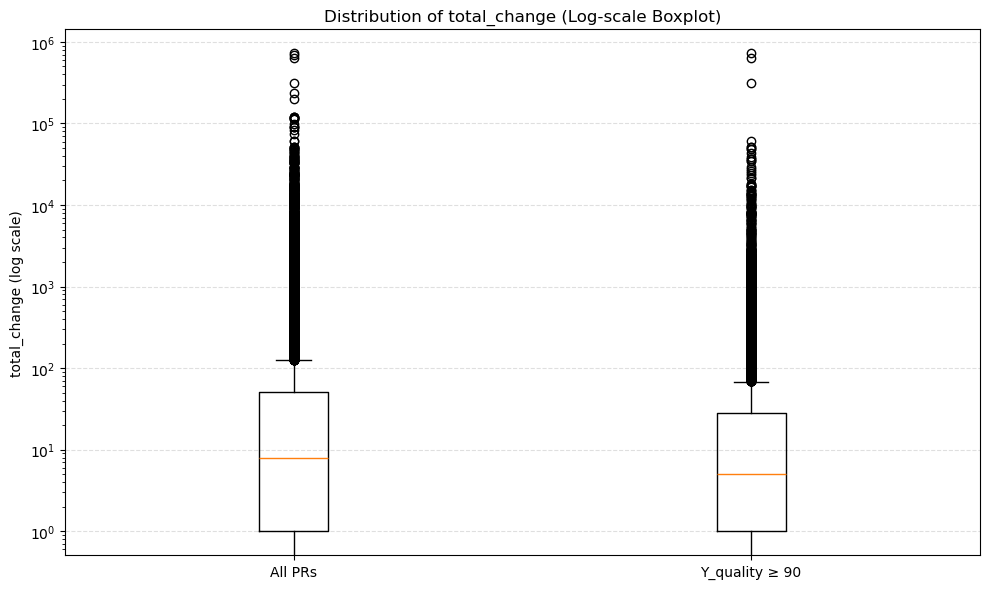

In [32]:
del1=(high['total_deletions'])
del2=(high['total_deletions'][high['Y_quality']>=90])
stat, p = ks_2samp(del1, del2)
print("KS statistic:", stat)
print("p-value:", p)
if p < 0.05:
    print("Two distributions are significantly different")
else:
    print("No significant difference in distributions")
plt.figure(figsize=(10, 6))
plt.boxplot([del1, del2], tick_labels=["All PRs", "Y_quality ≥ 90"])
plt.yscale("log")
plt.title("Distribution of total_change (Log-scale Boxplot)")
plt.ylabel("total_change (log scale)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

KS statistic: 0.055797668059206496
p-value: 1.9706355986078524e-27
Two distributions are significantly different


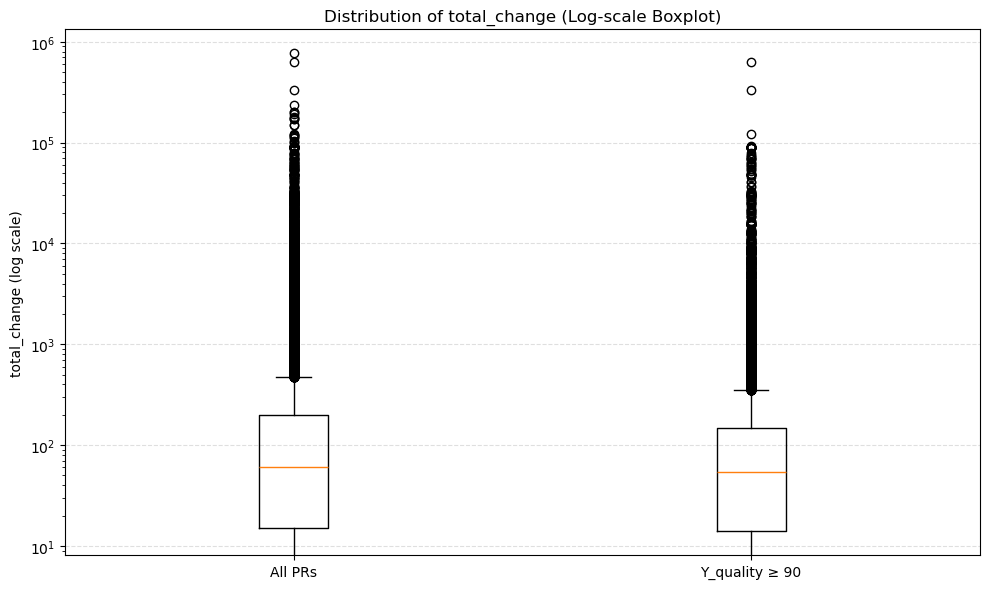

In [33]:
add1=(high['total_additions'])
add2=(high['total_additions'][high['Y_quality']>=90])
stat, p = ks_2samp(add1, add2)
print("KS statistic:", stat)
print("p-value:", p)
if p < 0.05:
    print("Two distributions are significantly different")
else:
    print("No significant difference in distributions")
plt.figure(figsize=(10, 6))
plt.boxplot([add1, add2], tick_labels=["All PRs", "Y_quality ≥ 90"])
plt.yscale("log")
plt.title("Distribution of total_change (Log-scale Boxplot)")
plt.ylabel("total_change (log scale)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#### Step 2.7 Repo Stars:

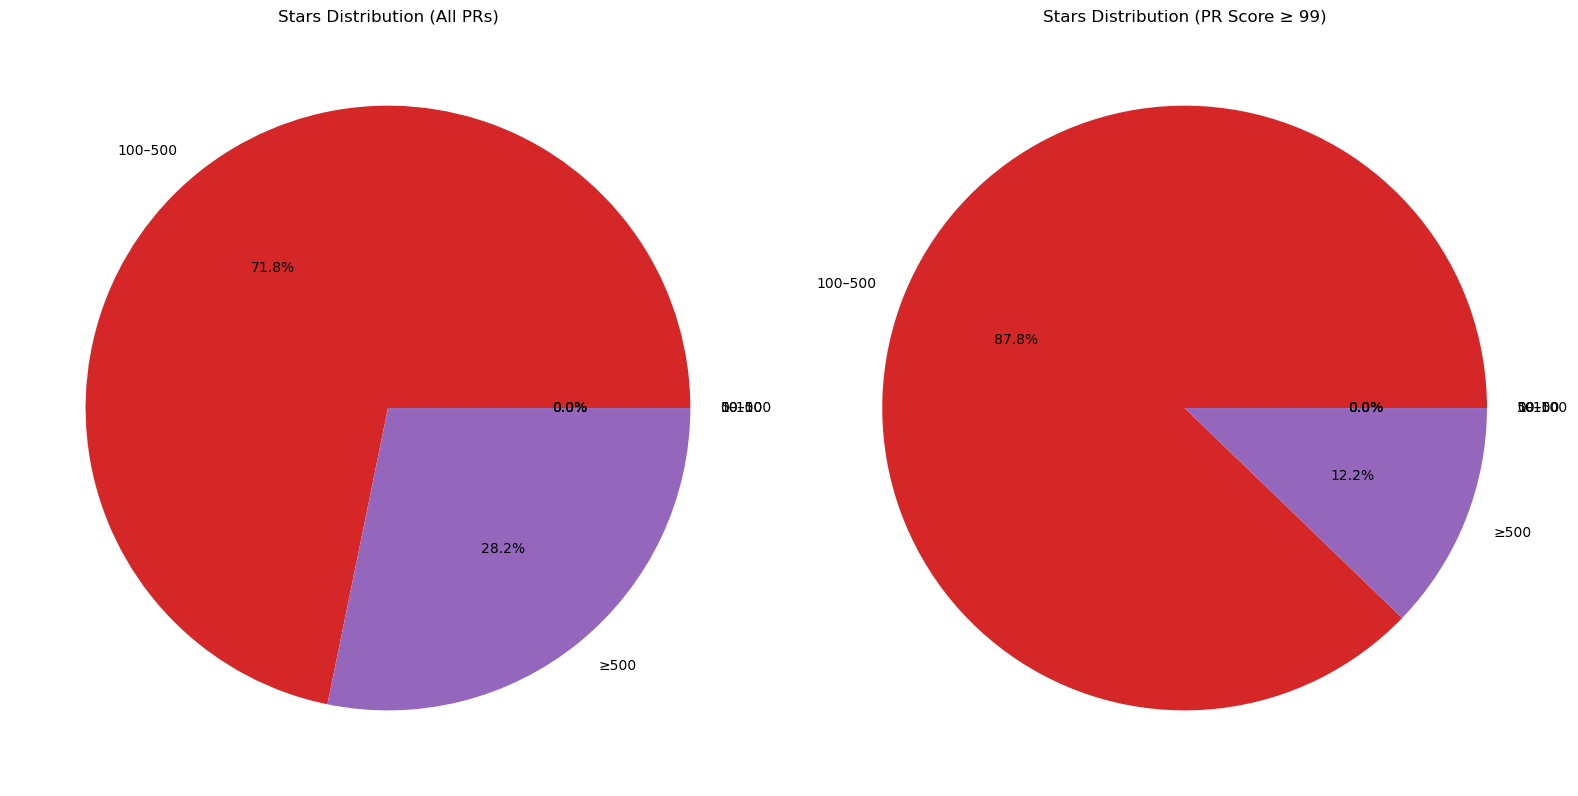

In [24]:
stars1 = high['stars']
stars2 = (high['stars'][high['Y_quality']>=90])
bins = [0, 10, 50, 100, 500, float('inf')]
labels = ["0–10", "10–50", "50–100", "100–500", "≥500"]
stars1_bin = pd.cut(high['stars'], bins=bins, labels=labels)
stars2_bin = pd.cut((high['stars'][high['Y_quality']>=99]), bins=bins, labels=labels)
vc1 = stars1_bin.value_counts().sort_index()
vc2 = stars2_bin.value_counts().sort_index()
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].pie(vc1, labels=labels, autopct='%1.1f%%')
axs[0].set_title("Stars Distribution (All PRs)")

axs[1].pie(vc2, labels=labels, autopct='%1.1f%%')
axs[1].set_title("Stars Distribution (PR Score ≥ 99)")

plt.tight_layout()
plt.show()

The PRs repo star number is also significant factor for the quality of the PRs

## Step 3: Extracting all the significant facors for further analysis

In [45]:
df = high.copy()

df['Y_quality'] = df['Y_quality'].apply(lambda x: '>=90' if x >= 90 else '<90')

df = df.drop(columns=['type'])

df['commit_count'] = df['commit_count'].apply(lambda x: x if x <= 5 else 'more than 5')

df = df.drop(columns=['id_y', 'forks'])
df['stars'] = df['stars'].apply(lambda x: '>=500' if x >= 500 else '<500')
top10_lang = {
    'Go', 'Python', 'TypeScript', 'C#', 'Java', 'Rust',
    'JavaScript', 'HTML', 'Ruby', 'Kotlin'
}
df['language'] = df['language'].apply(lambda x: x if x in top10_lang else 'others')
df=df.drop(columns=['hqs','review_norm','review_norm_raw','review_log','time_log','time_norm_raw','time_log','created_at','closed_at','repo_id','turnaround_hours','review_count','time_norm','id_x'])
df.to_csv("high_classification.csv", index=False)

df.head()

,agent,Y_quality,commit_count,max_change,total_change,avg_change,total_additions,total_deletions,stars,language
0,Devin,>=90,more than 5,1050.0,2493.0,95.884615,1646.0,847.0,>=500,TypeScript
1,Devin,>=90,2.0,128.0,528.0,58.666667,515.0,13.0,>=500,TypeScript
2,Devin,>=90,more than 5,199.0,870.0,58.000000,433.0,437.0,<500,others
3,Devin,>=90,2.0,72.0,208.0,41.600000,197.0,11.0,>=500,TypeScript
4,Devin,>=90,more than 5,265.0,624.0,48.000000,541.0,83.0,>=500,TypeScript


## Step 4: Generate a random forest classification model to determine the quality of PR

In [89]:
for col in ['commit_count', 'stars', 'language']:
    df[col] = df[col].astype(str)

df['Y_quality'] = df['Y_quality'].astype(str)

X = df.drop(columns=['Y_quality'])
y = df['Y_quality']

categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(exclude='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=79486338
)

pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

# Train the model
pipe.fit(X_train, y_train)

# Test the model
y_pred = pipe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

rf = pipe.named_steps['rf']
importances = rf.feature_importances_

ohe = pipe.named_steps['preprocess'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

feature_names = list(ohe_feature_names) + numeric_cols

Accuracy: 0.8621694774099521
              precision    recall  f1-score   support

         <90       0.77      0.75      0.76      1385
        >=90       0.90      0.91      0.90      3418

    accuracy                           0.86      4803
   macro avg       0.83      0.83      0.83      4803
weighted avg       0.86      0.86      0.86      4803



We manage to train a model for predicting quality of merged PRs with 86.2% accuracy rate

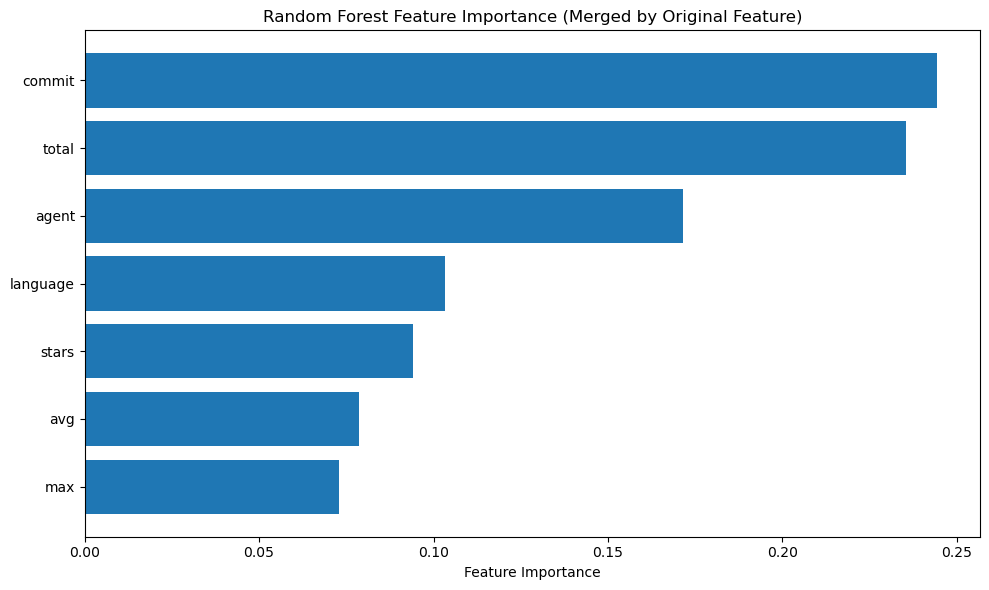

In [102]:
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
feature_names = list(ohe_feature_names) + numeric_cols
importances = model.feature_importances_
fi_raw = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})
fi_raw['original_feature'] = fi_raw['feature'].apply(lambda x: x.split('_')[0])
fi_merged = fi_raw.groupby('original_feature')['importance'].sum().reset_index()
fi_merged = fi_merged.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(fi_merged['original_feature'], fi_merged['importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (Merged by Original Feature)")
plt.tight_layout()
plt.show()

From the feature-importance plot, we observe that the most influential factor for predicting high-efficiency PRs is commit count, followed by total change. The type of agent emerges as the third most significant predictor, while the repository language and star level rank as the fourth and fifth most important features, respectively

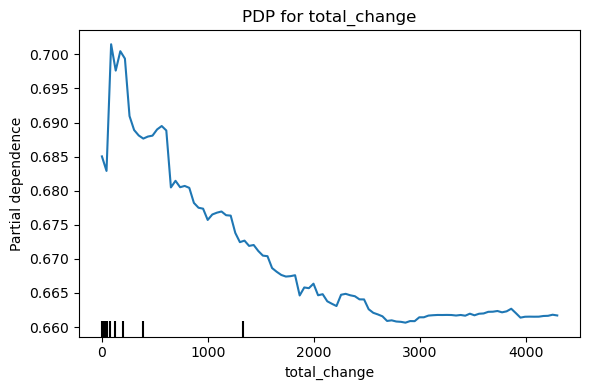

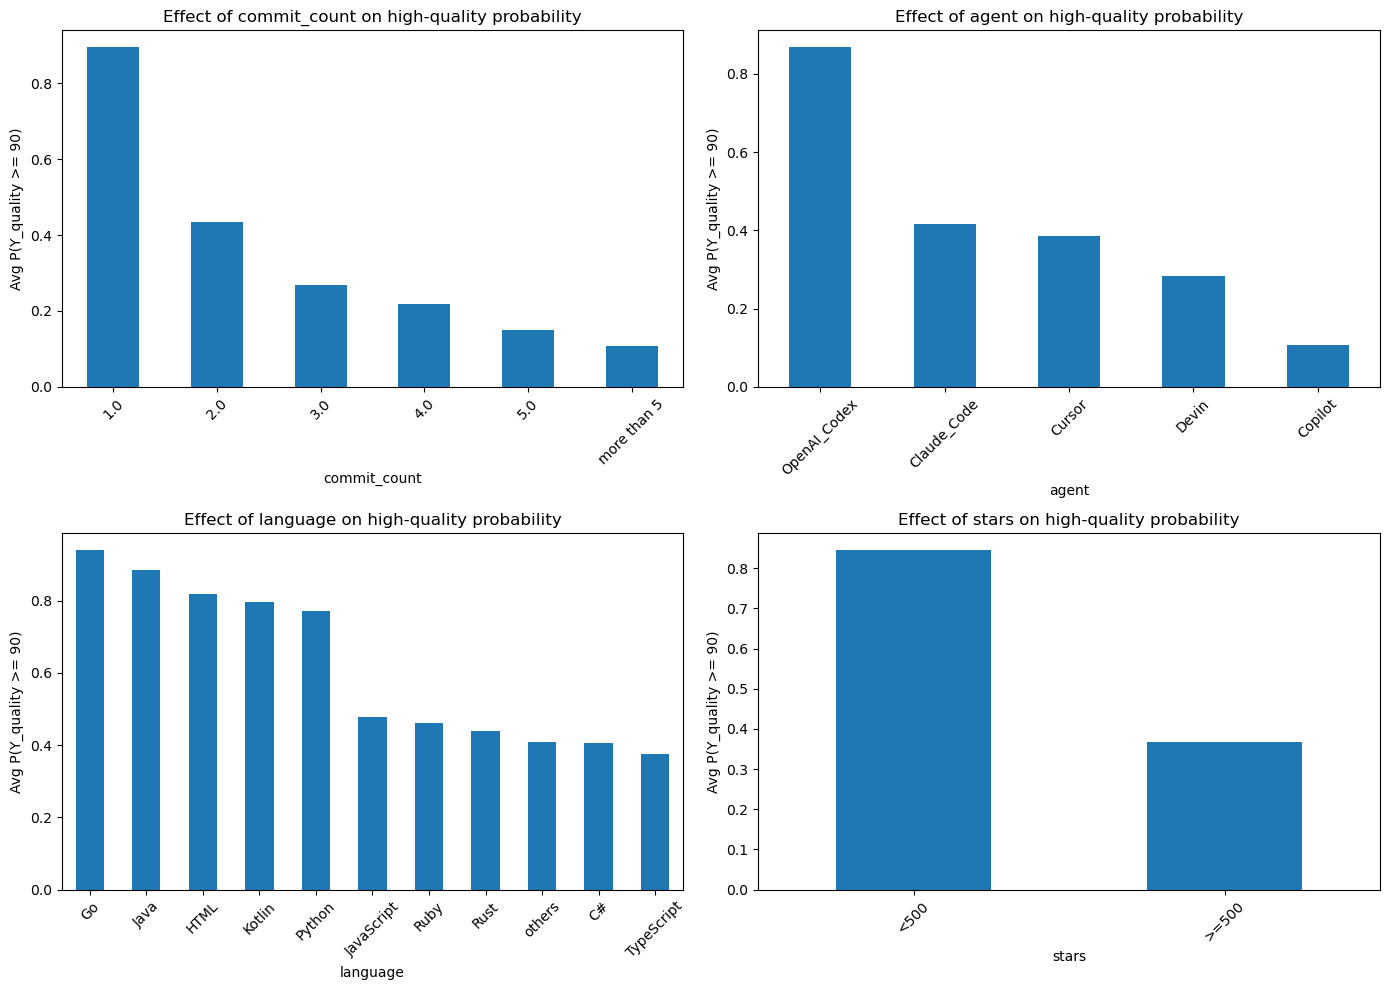

In [103]:
pdp_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42))
])
pdp_model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 4))
PartialDependenceDisplay.from_estimator(
    pdp_model,
    X_train,
    features=['total_change'],
    kind="average",
    ax=ax
)
ax.set_title("PDP for total_change")
plt.tight_layout()
plt.show()

proba = pdp_model.predict_proba(X_train)

class_index = list(pdp_model.named_steps['rf'].classes_).index('>=90')
high_prob = proba[:, class_index]

X_train_with_prob = X_train.copy()
X_train_with_prob['high_quality_prob'] = high_prob

def plot_cat_effect(col, ax):
    avg_prob = (
        X_train_with_prob
        .groupby(col)['high_quality_prob']
        .mean()
        .sort_values(ascending=False)
    )
    avg_prob.plot(kind='bar', ax=ax)
    ax.set_title(f"Effect of {col} on high-quality probability")
    ax.set_ylabel("Avg P(Y_quality >= 90)")
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

cat_features = ['commit_count', 'agent', 'language', 'stars']
for ax, col in zip(axs.ravel(), cat_features):
    plot_cat_effect(col, ax)

plt.tight_layout()
plt.show()

## Conclusion:

Based on the partial dependence plot for `total_change` and the grouped probability plots for `commit_count`, `agent`, `language`, and `stars`, we summarize the key findings as follows:

1. **Total Code Change Volume**  
   The partial dependence curve shows a clear negative relationship between `total_change` and the likelihood of achieving high PR quality (≥ 90). PRs with smaller overall code changes tend to have higher predicted quality, suggesting that extensive modifications may introduce additional complexity or risk.

2. **Commit Count**  
   PRs with only **one commit** exhibit the highest probability of achieving high quality, whereas PRs with more commits show progressively lower likelihoods. This pattern implies that PRs requiring multiple rounds of revisions may indicate initial lower quality or less efficient problem-solving.

3. **Agent Type**  
   The agent used to generate the PR plays a substantial role. PRs authored by **OpenAI_Codex** show the highest predicted probability of high quality, followed by Claude_Code and Cursor. Devin and Copilot perform comparatively worse, indicating meaningful variability in AI agent effectiveness.

4. **Programming Language**  
   Among the top-used languages, PRs written in **Go, Java, HTML, Kotlin, and Python** are more likely to achieve high-quality scores. In contrast, languages such as **JavaScript, Ruby, Rust, C#, and especially TypeScript** exhibit lower high-quality probabilities, suggesting that certain languages may introduce domain-specific challenges.

5. **Repository Popularity (Stars)**  
   Repositories with fewer than 500 stars tend to produce PRs with higher predicted quality. PRs from highly starred repositories (≥ 500) show notably lower probabilities, potentially because larger or more popular projects involve stricter requirements and more complex codebases, making high-quality contributions harder to achieve.

Overall, the findings highlight several structural factors—code change size, commit patterns, agent choice, language usage, and project scale—that collectively influence the likelihood of achieving high-quality PR outputs.